In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")


In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Data Preprocessing

In [5]:
import matplotlib.pyplot as plt
import  seaborn as sns

In [6]:
train_data.shape

(891, 12)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train_data.drop(columns=['Cabin'], inplace=True)
test_data.drop(columns=['Cabin'], inplace=True)

In [10]:
train_data.dropna(subset=['Embarked'], inplace=True)
test_data.dropna(subset=['Embarked'],inplace =True)

In [11]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [12]:
train_data["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')

In [14]:
age_column = train_data[['Age']]
age_imputed = pd.DataFrame(imputer.fit_transform(age_column))
age_imputed.shape
train_data['Age'].shape

(889,)

In [15]:
test_age_column = test_data[['Age']]
test_age_imputed = pd.DataFrame(imputer.fit_transform(test_age_column))

In [16]:
train_data['Age'] = age_imputed


In [17]:
test_data['Age'] = test_age_imputed

In [18]:
train_data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            2
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
train_data.dropna(subset=['Age'], inplace = True)
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [20]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [21]:
test_data.dropna(subset=['Fare'], inplace = True)
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

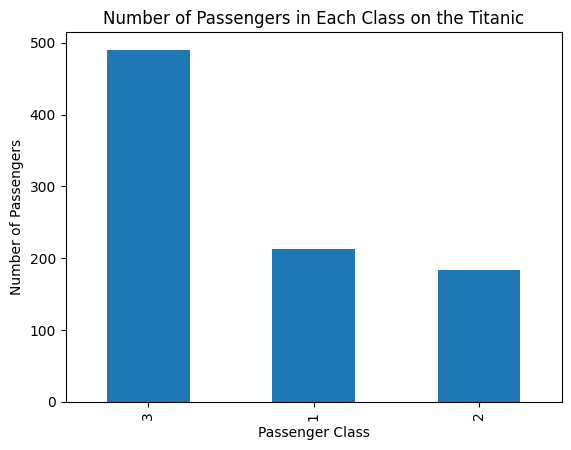

In [22]:
class_counts = train_data['Pclass'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers in Each Class on the Titanic')
plt.show()

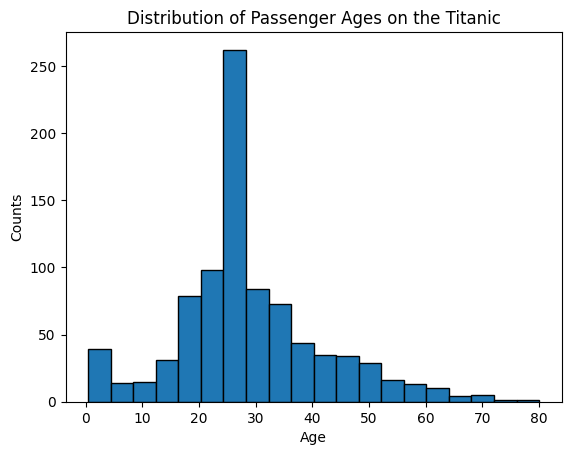

In [23]:
plt.hist(train_data['Age'].dropna(),bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Distribution of Passenger Ages on the Titanic')
plt.show()

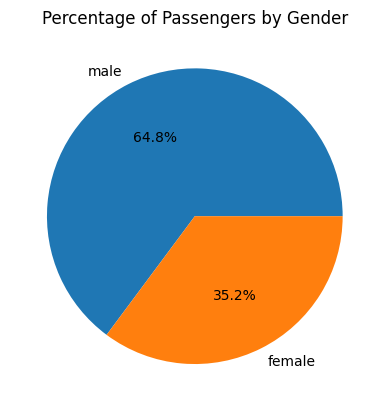

In [24]:
plt.pie(train_data['Sex'].value_counts(),labels=["male","female"],autopct='%1.1f%%')
plt.title('Percentage of Passengers by Gender')
plt.show()

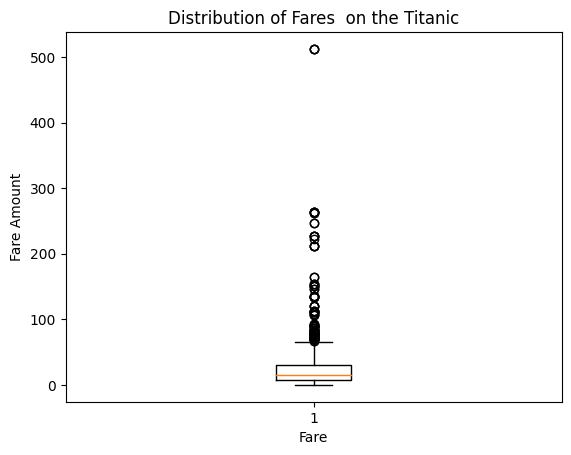

In [25]:
plt.boxplot(train_data['Fare'].dropna())
         

plt.xlabel('Fare')
plt.ylabel('Fare Amount')
plt.title('Distribution of Fares  on the Titanic')

plt.show()

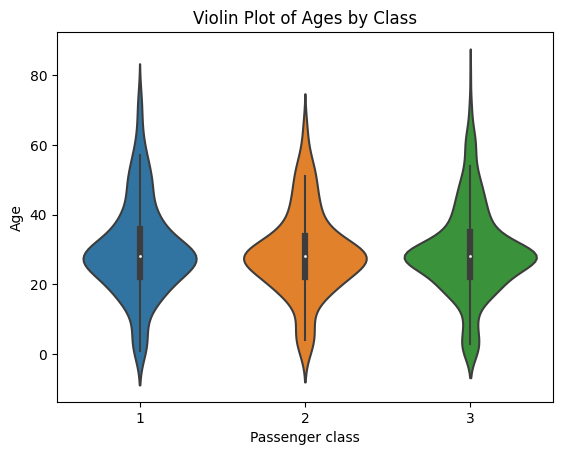

In [26]:
sns.violinplot(x=train_data["Pclass"],y=train_data["Age"])
plt.xlabel('Passenger class')
plt.ylabel('Age')
plt.title('Violin Plot of Ages by Class')
plt.show()

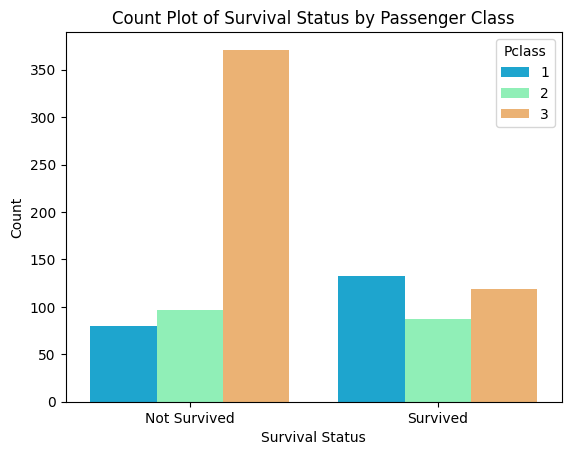

In [27]:
sns.countplot(x='Survived',hue='Pclass',data=train_data,palette='rainbow')
plt.xticks([0,1],['Not Survived','Survived'])
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Count Plot of Survival Status by Passenger Class')
plt.show()

In [28]:
train_data['People_Related'] = train_data['SibSp'] + train_data['Parch']
test_data['People_Related'] = test_data['SibSp'] + test_data['Parch']

In [29]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,People_Related
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [30]:
from sklearn.preprocessing import OneHotEncoder 
encoder = OneHotEncoder()

encoded_values = encoder.fit_transform(train_data[['Sex', 'Embarked']]).toarray()
encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(['Sex', 'Embarked']))
df_encoded = pd.concat([train_data, encoded_df], axis=1)


In [31]:
test_encoded_values = encoder.fit_transform(test_data[['Sex', 'Embarked']]).toarray()
test_encoded_df = pd.DataFrame(test_encoded_values, columns=encoder.get_feature_names_out(['Sex', 'Embarked']))
test_df_encoded = pd.concat([test_data, test_encoded_df], axis=1)

In [32]:
df_encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,People_Related,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,S,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C,1.0,1.0,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,S,0.0,1.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,S,1.0,1.0,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,S,0.0,0.0,1.0,0.0,0.0,1.0


In [33]:
test_df_encoded.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,People_Related,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892.0,3.0,"Kelly, Mr. James",male,34.5,0.0,0.0,330911,7.8292,Q,0.0,0.0,1.0,0.0,1.0,0.0
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1.0,0.0,363272,7.0000,S,1.0,1.0,0.0,0.0,0.0,1.0
2,894.0,2.0,"Myles, Mr. Thomas Francis",male,62.0,0.0,0.0,240276,9.6875,Q,0.0,0.0,1.0,0.0,1.0,0.0
3,895.0,3.0,"Wirz, Mr. Albert",male,27.0,0.0,0.0,315154,8.6625,S,0.0,0.0,1.0,0.0,0.0,1.0
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1.0,1.0,3101298,12.2875,S,2.0,1.0,0.0,0.0,0.0,1.0


In [34]:
df_encoded.drop(columns =['Name','Ticket','SibSp','Parch','Ticket','Sex','Embarked'],inplace = True)
test_df_encoded.drop(columns =['Name','Ticket','SibSp','Parch','Ticket','Sex','Embarked'],inplace = True)

In [35]:
df_encoded.head()

,PassengerId,Survived,Pclass,Age,Fare,People_Related,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,3.0,22.0,7.2500,1.0,0.0,1.0,0.0,0.0,1.0
1,2.0,1.0,1.0,38.0,71.2833,1.0,1.0,0.0,1.0,0.0,0.0
2,3.0,1.0,3.0,26.0,7.9250,0.0,1.0,0.0,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,53.1000,1.0,1.0,0.0,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0


In [36]:
test_df_encoded.head()

,PassengerId,Pclass,Age,Fare,People_Related,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892.0,3.0,34.5,7.8292,0.0,0.0,1.0,0.0,1.0,0.0
1,893.0,3.0,47.0,7.0000,1.0,1.0,0.0,0.0,0.0,1.0
2,894.0,2.0,62.0,9.6875,0.0,0.0,1.0,0.0,1.0,0.0
3,895.0,3.0,27.0,8.6625,0.0,0.0,1.0,0.0,0.0,1.0
4,896.0,3.0,22.0,12.2875,2.0,1.0,0.0,0.0,0.0,1.0


In [37]:
test_df_encoded.isnull().sum()
test_df_encoded.dropna(inplace = True)

In [38]:
test_df_encoded.isnull().sum()

PassengerId       0
Pclass            0
Age               0
Fare              0
People_Related    0
Sex_female        0
Sex_male          0
Embarked_C        0
Embarked_Q        0
Embarked_S        0
dtype: int64

In [39]:
df_encoded.isna().sum()

PassengerId       2
Survived          2
Pclass            2
Age               2
Fare              2
People_Related    2
Sex_female        2
Sex_male          2
Embarked_C        2
Embarked_Q        2
Embarked_S        2
dtype: int64

In [40]:
df_encoded.dropna(inplace = True)

In [41]:
X_train = df_encoded.iloc[:,2:]
y_train = df_encoded['Survived']
y_train.isnull().sum()
X_train.head()

,Pclass,Age,Fare,People_Related,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,22.0,7.2500,1.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,71.2833,1.0,1.0,0.0,1.0,0.0,0.0
2,3.0,26.0,7.9250,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,35.0,53.1000,1.0,1.0,0.0,0.0,0.0,1.0
4,3.0,35.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0


In [42]:
X_train.shape

(885, 9)

In [43]:
y_train.shape

(885,)

In [44]:
X_test = test_df_encoded.iloc[:,1:]
X_test.head()

,Pclass,Age,Fare,People_Related,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3.0,34.5,7.8292,0.0,0.0,1.0,0.0,1.0,0.0
1,3.0,47.0,7.0000,1.0,1.0,0.0,0.0,0.0,1.0
2,2.0,62.0,9.6875,0.0,0.0,1.0,0.0,1.0,0.0
3,3.0,27.0,8.6625,0.0,0.0,1.0,0.0,0.0,1.0
4,3.0,22.0,12.2875,2.0,1.0,0.0,0.0,0.0,1.0


In [45]:
df_encoded.isnull().sum()
df_encoded.dropna(inplace =True)

In [46]:
import xgboost as xgb
from catboost import CatBoostClassifier, CatBoostRegressor
import lightgbm as lgb


In [47]:
xgb_model = xgb.XGBClassifier() 
catboost_model = CatBoostClassifier()
lgb_model = lgb.LGBMClassifier()

In [48]:
from sklearn.metrics import accuracy_score

xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_train_preds = xgb_model.predict(X_train)

xgb_train_accuracy = accuracy_score(y_train, xgb_train_preds)

print(f"Training Accuracy: {xgb_train_accuracy:.2f}")

Training Accuracy: 0.94


In [49]:

lgb_model.fit(X_train, y_train)
lgb_preds = lgb_model.predict(X_test)
lgb_train_preds = lgb_model.predict(X_train)

lgb_train_accuracy = accuracy_score(y_train, lgb_train_preds)

print(f"Training Accuracy: {lgb_train_accuracy:.2f}")

[LightGBM] [Info] Number of positive: 338, number of negative: 547
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 220
[LightGBM] [Info] Number of data points in the train set: 885, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.381921 -> initscore=-0.481403
[LightGBM] [Info] Start training from score -0.481403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training Accuracy: 0.92


In [50]:
catboost_model.fit(X_train, y_train)
catboost_preds = catboost_model.predict(X_test)
catboost_train_preds = catboost_model.predict(X_train)

cat_train_accuracy = accuracy_score(y_train, catboost_train_preds)

print(f"Training Accuracy: {cat_train_accuracy:.2f}")


Learning rate set to 0.009779
0:	learn: 0.6905428	total: 58.8ms	remaining: 58.8s
1:	learn: 0.6879209	total: 60.3ms	remaining: 30.1s
2:	learn: 0.6862927	total: 61.2ms	remaining: 20.4s
3:	learn: 0.6846753	total: 62.4ms	remaining: 15.5s
4:	learn: 0.6824370	total: 63.7ms	remaining: 12.7s
5:	learn: 0.6802149	total: 64.8ms	remaining: 10.7s
6:	learn: 0.6778842	total: 66ms	remaining: 9.36s
7:	learn: 0.6758985	total: 67.1ms	remaining: 8.32s
8:	learn: 0.6734708	total: 68.5ms	remaining: 7.54s
9:	learn: 0.6714811	total: 69.7ms	remaining: 6.9s
10:	learn: 0.6699388	total: 70.5ms	remaining: 6.34s
11:	learn: 0.6685686	total: 71.4ms	remaining: 5.88s
12:	learn: 0.6666055	total: 72.9ms	remaining: 5.54s
13:	learn: 0.6647726	total: 74.3ms	remaining: 5.23s
14:	learn: 0.6627556	total: 75.6ms	remaining: 4.96s
15:	learn: 0.6607075	total: 78.2ms	remaining: 4.81s
16:	learn: 0.6584967	total: 79.6ms	remaining: 4.6s
17:	learn: 0.6570306	total: 80.8ms	remaining: 4.41s
18:	learn: 0.6548840	total: 82.3ms	remaining: 4.

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
logistic_preds = logistic_regression_model.predict(X_test)
logistic_train_preds = logistic_regression_model.predict(X_train)
logistic_train_accuracy = accuracy_score(y_train, logistic_train_preds)

print(f"Training Accuracy: {logistic_train_accuracy:.2f}")

Training Accuracy: 0.68


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have your data and labels stored in X (features) and y (labels/targets) respectively



# Instantiate the Support Vector Machine classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Train the model
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
svm_train_preds = svm_model.predict(X_train)
svm_train_accuracy = accuracy_score(y_train, svm_train_preds)

print(f"Training Accuracy: {svm_train_accuracy:.2f}")

Training Accuracy: 0.68


In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have your data and labels stored in X (features) and y (labels/targets) respectively


# Instantiate the Naive Bayes classifier (GaussianNB for continuous features)
naive_bayes_model = GaussianNB()

# Train the model
naive_bayes_model.fit(X_train, y_train)
nb_preds = naive_bayes_model.predict(X_test)
nb_train_preds = naive_bayes_model.predict(X_train)
nb_train_accuracy = accuracy_score(y_train, nb_train_preds)

print(f"Training Accuracy: {nb_train_accuracy:.2f}")

Training Accuracy: 0.67


In [54]:
test_df_encoded['Survived'] = xgb_preds

In [55]:
test_df_encoded[['PassengerId','Survived']].to_csv('submission3.csv', index = False)

In [56]:
test_df_encoded['PassengerId']= test_df_encoded['PassengerId'].astype(int)

In [57]:
test_df_encoded['PassengerId'].head(100)

0     892
1     893
2     894
3     895
4     896
     ... 
95    987
96    988
97    989
98    990
99    991
Name: PassengerId, Length: 100, dtype: int64

In [58]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,People_Related
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S,0
417,1309,3,"Peter, Master. Michael J",male,27.0,1,1,2668,22.3583,C,2


In [59]:
test_data['PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 417, dtype: int64

In [60]:
892 +152

1044

In [61]:
test_df_encoded['Survived'] = svm_preds.astype(int)